In [1]:
!conda install --yes --quiet pymongo




# All requested packages already installed.
# packages in environment at /opt/conda:
#
pymongo                   3.4.0                    py36_0    defaults


In [74]:
import pymongo
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import re
import requests
import pandas as pd
import numpy as np

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#### Importing Machine Learning DataFrame

In [241]:
machine_learning_md3_df.to_pickle('../pickle_jar/machine_learning_md3_df.p')

In [3]:
machine_learning_md3_df = pd.read_pickle('../pickle_jar/machine_learning_md3_df.p')

In [4]:
machine_learning_md3_df.tail()

,ns,pageid,title,Category,Text
1527,0,11273721,Hierarchical temporal memory,Machine Learning,Hierarchical temporal memory HTM is a biologic...
1528,0,33742232,Restricted Boltzmann machine,Machine Learning,A restricted Boltzmann machine RBM is a genera...
1529,0,76996,Self-organizing map,Machine Learning,A selforganizing map SOM or selforganizing fea...
1530,0,48813654,Sparse dictionary learning,Machine Learning,Sparse dictionary learning is a representation...
1531,0,47805,Vector quantization,Machine Learning,Vector quantization VQ is a classical quantiza...


In [5]:
# machine_learning_md3_df['Text'][177] = get_page_contents(1579244)
machine_learning_md3_df.head()

,ns,pageid,title,Category,Text
0,0,43385931,Data exploration,Machine Learning,Data exploration is an approach similar to ini...
1,0,49082762,List of datasets for machine learning research,Machine Learning,These datasets are used for machinelearning re...
2,0,233488,Machine learning,Machine Learning,Machine learning is a field of computer scienc...
3,0,53587467,Outline of machine learning,Machine Learning,The following outline is provided as an overvi...
4,0,3771060,Accuracy paradox,Machine Learning,The accuracy paradox for predictive analytics ...


#### Importing Business Software Dataframe

In [11]:
business_software_md3_df.shape

(4121, 5)

In [7]:
business_software_md3_df.tail()

,ns,pageid,title,Category,Text
4116,0,1577008,Ted (word processor),Business Software,Ted is a word processor for the X Window Syste...
4117,0,37628014,Thorn EMI Liberator,Business Software,The Thorn EMI Liberator was a laptop word proc...
4118,0,34306381,Trelby,Business Software,Trelby is a free and open source screenwriting...
4119,0,29902828,Word Juggler,Business Software,Word Juggler was a word processor application ...
4120,0,826279,WordMARC,Business Software,WordMARC was a scientifically oriented word pr...


In [9]:
business_software_md3_df.to_pickle('../pickle_jar/business_software_md3_df.p')

###this DF contains ~4120 articles.

In [6]:
business_software_md3_df = pd.read_pickle('../pickle_jar/business_software_md3_df.p')

In [314]:
bs_dict = business_software_md3_df.to_dict('list')

### Combining both dataframes into 1


In [8]:
###creating new indexes in order to concatenate

bs_index_new_list = []
for i in range(2000, 6121):
    bs_index_new_list.append(i)
    
business_software_md3_df.index = bs_index_new_list


business_software_md3_df.tail()

,ns,pageid,title,Category,Text
6116,0,1577008,Ted (word processor),Business Software,Ted is a word processor for the X Window Syste...
6117,0,37628014,Thorn EMI Liberator,Business Software,The Thorn EMI Liberator was a laptop word proc...
6118,0,34306381,Trelby,Business Software,Trelby is a free and open source screenwriting...
6119,0,29902828,Word Juggler,Business Software,Word Juggler was a word processor application ...
6120,0,826279,WordMARC,Business Software,WordMARC was a scientifically oriented word pr...


In [10]:
dataframes = [machine_learning_md3_df, business_software_md3_df]
corpus = pd.concat(dataframes)
corpus.head()

,ns,pageid,title,Category,Text
0,0,43385931,Data exploration,Machine Learning,Data exploration is an approach similar to ini...
1,0,49082762,List of datasets for machine learning research,Machine Learning,These datasets are used for machinelearning re...
2,0,233488,Machine learning,Machine Learning,Machine learning is a field of computer scienc...
3,0,53587467,Outline of machine learning,Machine Learning,The following outline is provided as an overvi...
4,0,3771060,Accuracy paradox,Machine Learning,The accuracy paradox for predictive analytics ...


In [5]:
corpus.shape
## (5653, 6) is good

(5653, 6)

In [16]:
corpus.to_pickle('../pickle_jar/corpus.p')

In [5]:
corpus = pd.read_pickle('../pickle_jar/corpus.p')

,ns,pageid,title,Category,Text,Text_numerical
0,0,43385931,Data exploration,Machine Learning,Data exploration is an approach similar to ini...,922
1,0,49082762,List of datasets for machine learning research,Machine Learning,These datasets are used for machinelearning re...,3624
2,0,233488,Machine learning,Machine Learning,Machine learning is a field of computer scienc...,2112
3,0,53587467,Outline of machine learning,Machine Learning,The following outline is provided as an overvi...,3549
4,0,3771060,Accuracy paradox,Machine Learning,The accuracy paradox for predictive analytics ...,3512


#### Label Encode the Articles `'text'`, just to see the # of words in each article

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
corpus['Text_numerical'] = le.fit_transform(corpus['Text'])

In [15]:
corpus.tail()

,ns,pageid,title,Category,Text,Text_numerical
6116,0,1577008,Ted (word processor),Business Software,Ted is a word processor for the X Window Syste...,3280
6117,0,37628014,Thorn EMI Liberator,Business Software,The Thorn EMI Liberator was a laptop word proc...,3491
6118,0,34306381,Trelby,Business Software,Trelby is a free and open source screenwriting...,3724
6119,0,29902828,Word Juggler,Business Software,Word Juggler was a word processor application ...,3902
6120,0,826279,WordMARC,Business Software,WordMARC was a scientifically oriented word pr...,3905


### Text Vectorize the `corpus`

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')

In [8]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(corpus.Text)

In [9]:
document_term_matrix_sps

<5653x97117 sparse matrix of type '<class 'numpy.float64'>'
	with 1342211 stored elements in Compressed Sparse Row format>

In [10]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=corpus.index,
                                       columns=tfidf_vectorizer.get_feature_names())

document_term_matrix_df.head()

,00,000,000001,00001,0001,00010782,000198,000198ttt01584tft000198ttt0288ttf01584tft00tfffrac,0001l,0002,...,高橋書店ゲーム攻略本シリーズ,사이버메드,자이오넥스,훈민정음,ﬁnitelength,ﬂexibility,ﬂock,ﬂocking,ﬂow,ａ列車で行こうｍｄ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
document_term_matrix_df.to_pickle('../pickle_jar/document_term_matrix_df.p')

In [ ]:
document_term_matrix_df = pd.read_pickle('../pickle_jar/document_term_matrix_df.p')

### Compute SVD of Document Term Matrix

In [11]:
from sklearn.decomposition import TruncatedSVD

In [12]:
document_term_matrix_df.shape

(5653, 97117)

In [13]:
## 1st iteration = 50 components
## 2nd iteration = 250 components
## 3rd iteration = 1000 components (takes a long time! memory error!)

n_components = 50
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [14]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)

In [15]:
svd_matrix.shape

(5653, 50)

In [16]:
svd_df = pd.DataFrame(svd_matrix, 
                      index=document_term_matrix_df.index, 
                      columns=component_names)

In [20]:
svd_df.to_pickle('../pickle_jar/svd_df.p')

### LoadSVD Matrix with Documents and Labels

In [69]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=document_term_matrix_df.index,
                                        columns=component_names)
# latent_semantic_analysis['sentence'] = corpus_df.sentence
# latent_semantic_analysis['category'] = corpus['Category']
latent_semantic_analysis.tail()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_42,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50,category
6116,0.076394,-0.076488,-0.005795,-0.006340,0.048967,0.082995,0.123088,0.006026,0.088920,0.015342,...,0.005185,-0.004383,0.007622,0.006809,-0.030153,0.090428,-0.061336,-0.002320,-0.020957,2
6117,0.046260,-0.046353,-0.000080,0.013365,-0.015399,0.012675,0.015341,-0.004380,0.010401,0.008004,...,-0.010736,-0.012113,-0.003759,0.007840,-0.002981,0.007593,-0.002132,0.001821,-0.002080,2
6118,0.056335,-0.066986,-0.014911,-0.000147,0.058057,0.018714,0.009319,-0.017175,0.038954,0.023111,...,-0.013387,-0.020257,0.006745,0.034725,0.006830,-0.013227,-0.001016,0.006087,0.002676,2
6119,0.063006,-0.065104,-0.007099,0.009145,0.004131,0.043100,0.106104,0.003240,0.059052,0.024876,...,-0.008218,-0.023083,-0.006043,0.024147,-0.023418,0.053033,-0.020674,-0.005785,-0.002076,2
6120,0.102328,-0.081250,0.010215,-0.000051,0.001573,0.077492,0.100573,0.027362,0.044004,0.016380,...,0.007816,-0.007896,-0.007018,0.018148,-0.025700,0.043155,-0.034940,0.044113,0.021237,2


In [72]:
latent_semantic_analysis.drop('category', axis=1, inplace=True)

In [86]:
search_term1 = "Machine Learning"
search_term2 = 'Business Software'

In [83]:
search_term_vec1 = tfidf_vectorizer.transform([search_term1])

In [84]:
search_term_lsa1 = SVD.transform(search_term_vec1)

In [87]:
search_term_vec2 = tfidf_vectorizer.transform([search_term2])
search_term_lsa2 = SVD.transform(search_term_vec2)

In [70]:
cosine_similarities1 = latent_semantic_analysis.values.dot(search_term_lsa1.T).ravel()
### Had to use .values to turn latent_semantic_analysis to an array
### .ravel() does not work on dataframes, only arrays

In [62]:
corpus.drop('Category_num', axis=1, inplace=True)

# Predictive Analysis

#### Replacing Machine Learning with 1; Business Software with 2

In [64]:
corpus.Category.replace('Machine Learning', 1, inplace=True)
corpus.Category.replace('Business Software', 2, inplace=True)

In [66]:
corpus.tail()

,ns,pageid,title,Category,Text,Text_numerical
6116,0,1577008,Ted (word processor),2,Ted is a word processor for the X Window Syste...,3280
6117,0,37628014,Thorn EMI Liberator,2,The Thorn EMI Liberator was a laptop word proc...,3491
6118,0,34306381,Trelby,2,Trelby is a free and open source screenwriting...,3724
6119,0,29902828,Word Juggler,2,Word Juggler was a word processor application ...,3902
6120,0,826279,WordMARC,2,WordMARC was a scientifically oriented word pr...,3905


In [67]:
corpus.Category.value_counts()

2    4121
1    1532
Name: Category, dtype: int64

#### Using Gridsearch to find the best predictive model

In [73]:
KNN = KNeighborsClassifier()
gs = GridSearchCV(KNN, param_grid={'n_neighbors':range(2,20)})
gs.fit(latent_semantic_analysis, corpus['Category'])

### make sure that the latent_semantic_analysis DF does NOT include 'Categpry'

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [75]:
gs_res_df = pd.DataFrame(gs.cv_results_)
gs_res_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.00841975,0.00757519,0.00917681,0.00820716,0.00857965,0.00862535,0.00964578,0.00846974,0.00753911,0.00788569,0.00801675,0.00846585,0.00826192,0.00867478,0.00868487,0.00835093,0.00798774,0.00827344
mean_score_time,0.355546,0.374009,0.444865,0.431874,0.450185,0.448647,0.472847,0.451722,0.442235,0.448468,0.462954,0.474984,0.475352,0.485183,0.494095,0.489717,0.462692,0.489445
mean_test_score,0.915266,0.967274,0.958783,0.969397,0.96922,0.968512,0.969397,0.967982,0.969043,0.967805,0.96922,0.967628,0.968512,0.967982,0.968689,0.96692,0.968158,0.966213
mean_train_score,0.989652,0.989121,0.986556,0.985141,0.98576,0.982487,0.983018,0.980542,0.981249,0.978065,0.97895,0.976473,0.977269,0.975589,0.976296,0.975323,0.975677,0.973201
param_n_neighbors,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
params,{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},{'n_neighbors': 11},{'n_neighbors': 12},{'n_neighbors': 13},{'n_neighbors': 14},{'n_neighbors': 15},{'n_neighbors': 16},{'n_neighbors': 17},{'n_neighbors': 18},{'n_neighbors': 19}
rank_test_score,18,14,17,1,3,7,1,10,5,12,3,13,7,10,6,15,9,16
split0_test_score,0.834483,0.973475,0.95809,0.974005,0.974536,0.971883,0.973475,0.972414,0.974536,0.970822,0.972944,0.970822,0.972414,0.970292,0.971353,0.9687,0.970822,0.967639
split0_train_score,0.988057,0.988588,0.984342,0.984342,0.985934,0.981423,0.983015,0.979565,0.981953,0.979034,0.980096,0.977442,0.978238,0.97638,0.977707,0.975849,0.976115,0.97293
split1_test_score,0.954907,0.959682,0.95756,0.959151,0.959151,0.957029,0.959682,0.955438,0.957029,0.954907,0.958621,0.954377,0.955968,0.954907,0.955438,0.953316,0.955438,0.952785


In [77]:
%matplotlib inline

#### Plot of `n_neighbors` versus ``mean_test_score`

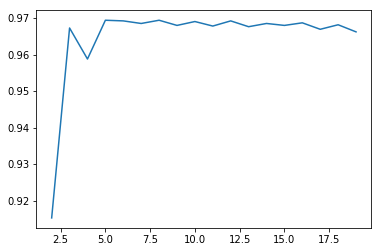

In [78]:
plt.plot(gs_res_df['param_n_neighbors'], gs_res_df['mean_test_score'])

In [79]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### The below shows us that the search term `Machine Learning` correctly predicts that it would fall underneath Category:Machine_learning  (category 1 is M.L.)

In [85]:
gs.predict(search_term_lsa1)

array([1])

#### The below shows us that the search term `Business Software` correctly predicts that it would fall underneath Category:Business_software (Category 2 is B.S.)

In [88]:
gs.predict(search_term_lsa2)

array([2])

### In summary, just give me a search term and it will predict either:
- `Machine Learning` or 
- `Business Software`

In [89]:
test_search = 'Microsoft Office'

In [90]:
test_search_vec = tfidf_vectorizer.transform([test_search])
test_search_lsa = SVD.transform(test_search_vec)

In [91]:
gs.predict(test_search_lsa)

array([2])

#### search term for 'Microsoft Office' predicts Business Software